#### @ Author 3x Group
Support Vector Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| SVM |	83.9% | 0.18 | 0.57 |	

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================


C:\Users\moham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Unnamed: 0                           1470 non-null int64
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1

In [3]:
del df['Unnamed: 0']
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
df.shape

(1470, 51)

### Breaking Data into 70% Training and 30% Testing

In [5]:
#start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.7,random_state=52)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(df.columns[1], axis = 1)
x_test=test.drop(df.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 1029
For Test Set : 441


### To define best C Values

Acc Train: 0.854227, Acc Test:0.839002
Acc Train: 0.853256, Acc Test:0.839002
Acc Train: 0.853256, Acc Test:0.827664
Acc Train: 0.859086, Acc Test:0.836735


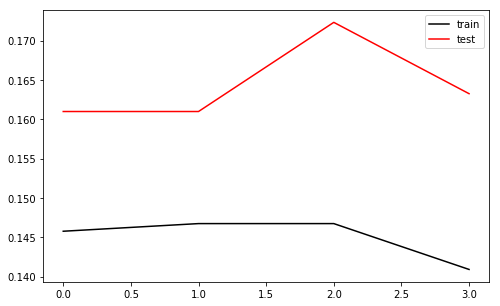

In [6]:
C_values = [0.01,0.1,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

### Running different kernels in combination to see who has a higher score
Cross validation

In [7]:
models = (svm.SVC(kernel='linear', C=0.1),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25))

X_train_s, X_val, Y_train_s, Y_val = train_test_split(x_train, y_train, test_size=0.3)

for idx,model in enumerate(models):
    model.fit(X_train_s,Y_train_s)
    tr_error = 1-model.score(X_train_s,Y_train_s)
    val_error = 1-model.score(X_val,Y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))

Model:0, Train Error:0.150000, Val Error:0.113269, Test Error:0.163265
Model:1, Train Error:0.000000, Val Error:0.126214, Test Error:0.163265
Model:2, Train Error:0.000000, Val Error:0.126214, Test Error:0.163265
Model:3, Train Error:0.175000, Val Error:0.126214, Test Error:0.163265


### Model 1

In [8]:
clf = svm.SVC(kernel='linear', C=0.1,random_state=52) # SVC stands for support vector classification
clf.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=52, shrinking=True,
  tol=0.001, verbose=False)

57
['age', 'businesstravel', 'dailyrate', 'degree', 'department_human', 'department_research', 'department_sales', 'development', 'director', 'distancefromhome', 'education', 'educationfield_human', 'educationfield_life', 'educationfield_marketing', 'educationfield_medical', 'educationfield_other', 'educationfield_technical', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'executive', 'gender_female', 'gender_male', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole_healthcare', 'jobrole_human', 'jobrole_laboratory', 'jobrole_manager', 'jobrole_manufacturing', 'jobrole_research', 'jobrole_sales', 'jobsatisfaction', 'maritalstatus_divorced', 'maritalstatus_married', 'maritalstatus_single', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'representative', 'resources', 'sciences', 'scientist', 'stockoptionlevel', 'technician', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebala

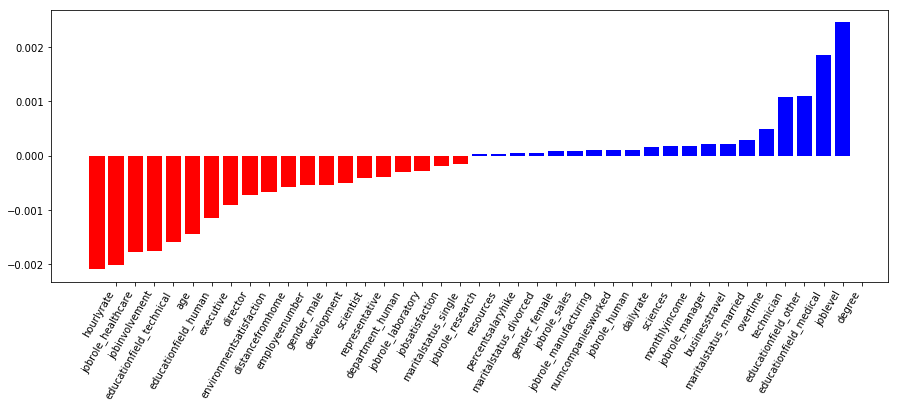

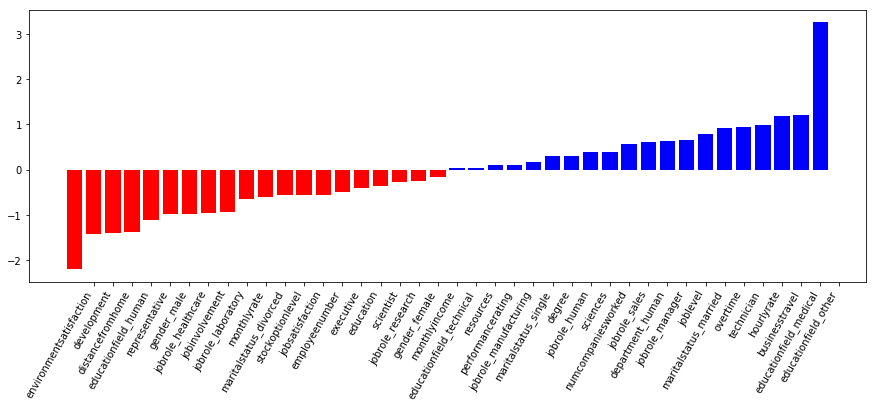

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

from sklearn.svm import LinearSVC
cv = CountVectorizer()
cv.fit(x_train)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x_train, y_train)
plot_coefficients(svm, cv.get_feature_names())
plot_coefficients(clf,cv.get_feature_names())

In [10]:
start_time = time.time()
from sklearn import svm
clf = svm.SVC(kernel='linear', C=0.1,random_state=52) # SVC stands for support vector classification
clf.fit(x_train, y_train)
model=clf

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          358  60
1           11  12
             precision    recall  f1-score   support

          0       0.86      0.97      0.91       369
          1       0.52      0.17      0.25        72

avg / total       0.80      0.84      0.80       441

0.8390022675736961
Duration: --- 3.6101134339968364 Minutes ---


### End Evaluation Metrics

ROC AUC: 0.57


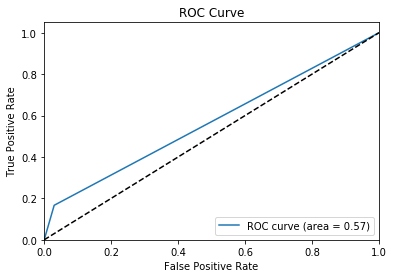

In [11]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.18847679029624453